# overview - stitch without overlap

In [1]:
from leicaexperiment import Experiment
from PIL import Image

## rotate images

In [2]:
whole = 'experiment--2015_04_14_15_54_58'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)
!dir $experiment.path

 Volume in drive D is DATADRIVE1
 Volume Serial Number is F805-2E08

 Directory of D:\MatrixScreenerImages\3.3.0_9757\experiment--2015_04_14_15_54_58

04/14/2015  06:05 PM    <DIR>          .
04/14/2015  06:05 PM    <DIR>          ..
04/14/2015  05:55 PM    <DIR>          AdditionalData
04/14/2015  05:55 PM    <DIR>          slide--S00
04/14/2015  06:06 PM        30,376,527 stitched--U00--V00--C00--Z00.png
               1 File(s)     30,376,527 bytes
               4 Dir(s)  1,668,400,320,512 bytes free


In [3]:
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)

In [136]:
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

## count of wells

In [137]:
from leicascanningtemplate import ScanningTemplate

In [138]:
tmpl = ScanningTemplate(experiment.scanning_template)
tmpl.properties.ScanFieldStageDistanceX, tmpl.properties.ScanFieldStageDistanceY # microns

(1579.53, 1579.53)

In [139]:
fx, fy = int(tmpl.properties.CountOfScanFieldsX), int(tmpl.properties.CountOfScanFieldsY)
fx, fy

(18, 11)

In [140]:
i = Image.open(experiment.images[0])

In [141]:
xs, ys = i.size
xs, ys

(512, 512)

In [142]:
i.close()

In [143]:
import numpy as np
from skimage import io

In [144]:
overview = np.zeros((ys*fy, xs*fx), dtype=np.uint8)

In [145]:
for n, img in enumerate(experiment.images):
    x = (n // fy) * 512
    x_end = x + 512
    y = (n % fy) * 512
    y_end = y + 512
    overview[y:y_end,x:x_end] = io.imread(img)

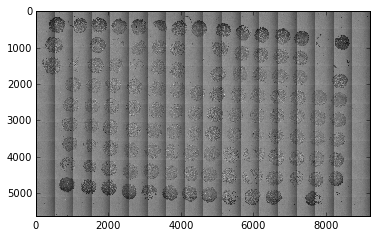

In [146]:
%matplotlib inline
io.imshow(overview, cmap='gray')

In [147]:
io.imsave('overview.png', overview) # not perfectly stitched

In [150]:
io.imsave(experiment.path + r'\stitched--U00--V00--C00--Z00.png', overview)

In [151]:
experiment.stitched

['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_14_15_54_58\\stitched--U00--V00--C00--Z00.png']

# find real x size

In [74]:
from leicacam import CAM
cam = CAM()

In [76]:
x1 = float(cam.get_information()['xpos'])

In [77]:
x2 = float(cam.get_information()['xpos'])

In [80]:
(x2-x1)*1e6*2

1570.69239999999

In [81]:
x1 = float(cam.get_information()['xpos'])

In [82]:
x2 = float(cam.get_information()['xpos'])

In [83]:
(x2-x1)*1e6

-1570.736500000003

# scan

In [152]:
from leicaautomator import automator

In [154]:
automator.find_spots(experiment)

Well distance x in microns: 1826.92609848
Well distance y in microns: 994.753239892
Well offsets
( well )   x[um], y[um]
-----------------------
( 0,  1)    -281,   616
( 0,  3)    -402,   367
( 1,  0)      49,    16
( 1,  3)    -374,   198
( 1,  6)    -538, -1059
( 1,  8)    -664, -1392
( 1,  9)    -810,  -785
( 1, 10)    -781,  -125
( 1, 12)    -971,  -363
( 1, 13)   -1050,   283
( 2,  0)    -180,     1
( 2,  1)    -276,   630
( 2,  3)    -451,   316
( 2,  6)    -565,  -948
( 2,  8)    -748, -1326
( 2,  9)    -798,  -706
( 2, 10)    -951,   -27
( 2, 12)    -945,  -251
( 2, 13)   -1046,   433
( 3,  0)    -367,    58
( 3,  1)    -491,   671
( 3,  3)    -607,   297
( 3,  6)    -815, -1013
( 3,  8)    -969, -1265
( 3,  9)   -1074,  -522
( 3, 11)   -1038,  -778
( 3, 12)   -1140,   -79
( 3, 13)   -1174,   528
( 4,  0)    -468,   148
( 4,  1)    -566,   817
( 4,  3)    -716,   346
( 4,  6)    -865,  -876
( 4,  8)    -947, -1116
( 4,  9)   -1003,  -311
( 4, 11)   -1089,  -594
( 4, 12)   -124

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ..., 
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int64),
  <skimage.measure._regionprops._RegionProperties at 0x675580b8>])

In [155]:
img, regions = _

In [156]:
from leicaautomator.utils import save_regions

In [157]:
save_regions(regions, 'regions.json')

TypeError: <matplotlib.patches.Polygon object at 0x0000000067547BA8> is not JSON serializable

In [158]:
from pickle import dump

In [161]:
dump(regions, open('regions.pickle', 'wb'))

In [163]:
automator.find_spots(experiment)

Well distance x in microns: 1825.86762372
Well distance y in microns: 1244.17503977
Well offsets
( well )   x[um], y[um]
-----------------------
( 0,  1)    -281,   366
( 0,  3)    -402,  -381
( 1,  0)      50,    16
( 1,  3)    -309,  -577
( 1,  6)    -537, -2556
( 1,  7)    -663, -2144
( 1,  8)    -809, -1786
( 1,  9)    -780, -1375
( 1, 10)    -997,  -931
( 1, 11)   -1010,  -383
( 2,  0)    -178,     1
( 2,  1)    -274,   380
( 2,  3)    -449,  -432
( 2,  6)    -563, -2445
( 2,  7)    -770, -1960
( 2,  8)    -796, -1707
( 2,  9)    -949, -1277
( 2, 10)    -943,  -755
( 2, 11)   -1043,  -321
( 3,  0)    -388,   110
( 3,  1)    -451,   433
( 3,  3)    -604,  -451
( 3,  6)    -812, -2510
( 3,  7)    -966, -2016
( 3,  8)   -1071, -1523
( 3,  9)   -1035, -1033
( 3, 10)   -1137,  -583
( 3, 11)   -1171,  -226
( 4,  0)    -503,   197
( 4,  1)    -525,   643
( 4,  3)    -751,  -378
( 4,  6)    -860, -2373
( 4,  7)    -942, -1867
( 4,  8)    -999, -1311
( 4,  9)    -961,  -850
( 4, 10)   -114

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ..., 
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]], dtype=int64),
  <skimage.measure._regionprops._RegionProperties at 0x713a3898>])

In [165]:
cam.flush()

# shg

In [4]:
whole = 'experiment--2015_04_14_18_37_20'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)
!dir $experiment.path
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

 Volume in drive D is DATADRIVE1
 Volume Serial Number is F805-2E08

 Directory of D:\MatrixScreenerImages\3.3.0_9757\experiment--2015_04_14_18_37_20

04/14/2015  08:37 PM    <DIR>          .
04/14/2015  08:37 PM    <DIR>          ..
04/14/2015  08:37 PM    <DIR>          AdditionalData
04/14/2015  08:37 PM    <DIR>          slide--S00
               0 File(s)              0 bytes
               4 Dir(s)  1,668,400,320,512 bytes free


In [5]:
experiment.stitch()

['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_14_18_37_20\\stitched--U00--V00--C00--Z00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_14_18_37_20\\stitched--U00--V00--C01--Z00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_14_18_37_20\\stitched--U00--V00--C02--Z00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_14_18_37_20\\stitched--U00--V00--C03--Z00.png']